In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plotter

df= pd.read_csv("input/results.csv")
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,False
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,True
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,True
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,False
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,True
...,...,...,...,...,...,...,...,...,...
4158,2020-03-10,France,Netherlands,3,3,Tournoi de France,Valenciennes,France,False
4159,2020-03-10,Belgium,Denmark,0,4,Algarve Cup,Lagos,Portugal,True
4160,2020-03-10,New Zealand,Norway,1,2,Algarve Cup,Faro/Loulé,Portugal,True
4161,2020-03-11,England,Spain,0,1,SheBelieves Cup,Frisco,United States,True


date ->  date of the match
home_team -> the name of the home team
away_team -> the name of the away team
home_score -> full-time home team score including extra time, not including penalty-shootouts
away_score -> full-time away team score including extra time, not including penalty-shootouts
tournament -> the name of the tournament
city -> the name of the city/town/administrative unit where the match was played
country -> the name of the country where the match was played
neutral -> TRUE/FALSE column indicating whether the match was played at a neutral venue


In [6]:
df.isnull().values.any()

False

In [7]:
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

El df,esta limpio en principio no se obaserva ningun nulo que haya que eliminar,se podria trabajar a priori con los datos,aunque en este caso como más adelante vamos a analizar los datos con estadistica descriptiva,habría que sustituir en el caso de nulos por valor 0 para que no desvirtuará la realidad.

In [31]:
#Se crea una nueva columna,para convertir en numericos los booleanos de la columna neutral,para comprobar si en eso en un futuro puede influir en los resultados obtenidos.
#neutral =0 juegan en  casa, neutral= false son los visitantes.

In [8]:
df['neutral'] = np.where(df['neutral']==True, 1, 0)
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,0
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,1
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,1
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,0
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,1
...,...,...,...,...,...,...,...,...,...
4158,2020-03-10,France,Netherlands,3,3,Tournoi de France,Valenciennes,France,0
4159,2020-03-10,Belgium,Denmark,0,4,Algarve Cup,Lagos,Portugal,1
4160,2020-03-10,New Zealand,Norway,1,2,Algarve Cup,Faro/Loulé,Portugal,1
4161,2020-03-11,England,Spain,0,1,SheBelieves Cup,Frisco,United States,1


In [11]:
def resultado(fila):
    if fila['home_score'] == fila['away_score']:
        val = 0
    elif fila['home_score'] > fila['away_score']:
        val = 1
    else:
        val = 2
    return val

In [12]:
df['score'] = df.apply(resultado, axis=1)
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,score
0,1969-11-01,Italy,France,1,0,Euro,Novara,Italy,0,1
1,1969-11-01,Denmark,England,4,3,Euro,Aosta,Italy,1,1
2,1969-11-02,England,France,2,0,Euro,Turin,Italy,1,1
3,1969-11-02,Italy,Denmark,3,1,Euro,Turin,Italy,0,1
4,1975-08-25,Thailand,Australia,3,2,AFC Championship,Hong Kong,Hong Kong,1,1
...,...,...,...,...,...,...,...,...,...,...
4158,2020-03-10,France,Netherlands,3,3,Tournoi de France,Valenciennes,France,0,0
4159,2020-03-10,Belgium,Denmark,0,4,Algarve Cup,Lagos,Portugal,1,2
4160,2020-03-10,New Zealand,Norway,1,2,Algarve Cup,Faro/Loulé,Portugal,1,2
4161,2020-03-11,England,Spain,0,1,SheBelieves Cup,Frisco,United States,1,2


In [13]:
df.groupby(['neutral']).agg({'score':sum})

,score
neutral,
0,2843
1,2146


In [14]:
df["neutral"].value_counts()

0    2324
1    1839
Name: neutral, dtype: int64

In [15]:
df["score"].value_counts()

1    2189
2    1400
0     574
Name: score, dtype: int64

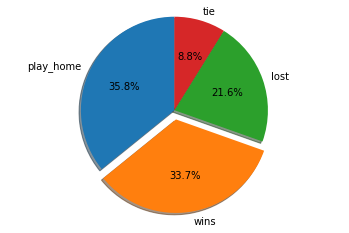

In [16]:
%matplotlib inline
labels ='play_home', 'wins','lost','tie'
sizes =[ 2324, 2189,1400,574]
explode = (0, 0.1, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [3]:
a=df.iloc[:, [3,4]]
b=a.describe()
b.round(0)

NameError: name 'df' is not defined

Se comprueba con una matriz de correlación y un heatmap.

<AxesSubplot:>

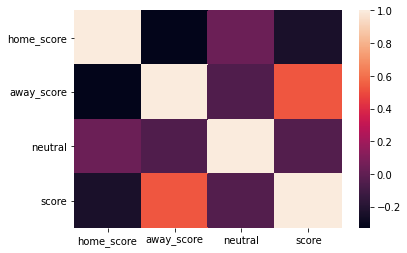

In [17]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Se puede confirmar una alta relación entre la puntuación del partido y el hecho de haberlo jugado en casa,se comfirma esta hipotesis.

In [18]:
df.to_csv(r'input/limpieza dataframe.csv',index=False,header=True)